In [98]:
import pandas as pd
import numpy as np
import missingno
import matplotlib.pyplot as plt

In [99]:
sold_merged = pd.read_csv("C:/Users/44756/Documents/Postgrad/DSA8030/Data/sold_merged.csv", dtype = {'brokered_by':'string', 'street':'string', 'zip_code':'string', 'po_box':'object'}, parse_dates = ['prev_sold_date'])

In [100]:
sold_merged.columns

Index(['brokered_by', 'price', 'bed', 'bath', 'acre_lot', 'street', 'city',
       'state', 'zip_code', 'house_size', 'prev_sold_date', 'county',
       'avgtemp', 'precipitation', 'maxtemp', 'mintemp', 'population',
       'density', 'po_box', 'dhighway', 'dlairport', 'dmairport', 'dshore',
       'nobusiness', 'adjusted_gross_income', 'total_income_amount',
       'number_of_returns'],
      dtype='object')

In [101]:
sold_merged.dtypes

brokered_by              string[python]
price                           float64
bed                             float64
bath                            float64
acre_lot                        float64
street                   string[python]
city                             object
state                            object
zip_code                 string[python]
house_size                      float64
prev_sold_date           datetime64[ns]
county                           object
avgtemp                         float64
precipitation                   float64
maxtemp                         float64
mintemp                         float64
population                        int64
density                         float64
po_box                           object
dhighway                        float64
dlairport                       float64
dmairport                       float64
dshore                          float64
nobusiness                      float64
adjusted_gross_income             int64


In [102]:
# Begin to investigate missingness.
sold_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763205 entries, 0 to 763204
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   brokered_by            760227 non-null  string        
 1   price                  763205 non-null  float64       
 2   bed                    694758 non-null  float64       
 3   bath                   686865 non-null  float64       
 4   acre_lot               664038 non-null  float64       
 5   street                 760966 non-null  string        
 6   city                   763107 non-null  object        
 7   state                  763205 non-null  object        
 8   zip_code               763205 non-null  string        
 9   house_size             667089 non-null  float64       
 10  prev_sold_date         763205 non-null  datetime64[ns]
 11  county                 763205 non-null  object        
 12  avgtemp                763205 non-null  floa

<Axes: >

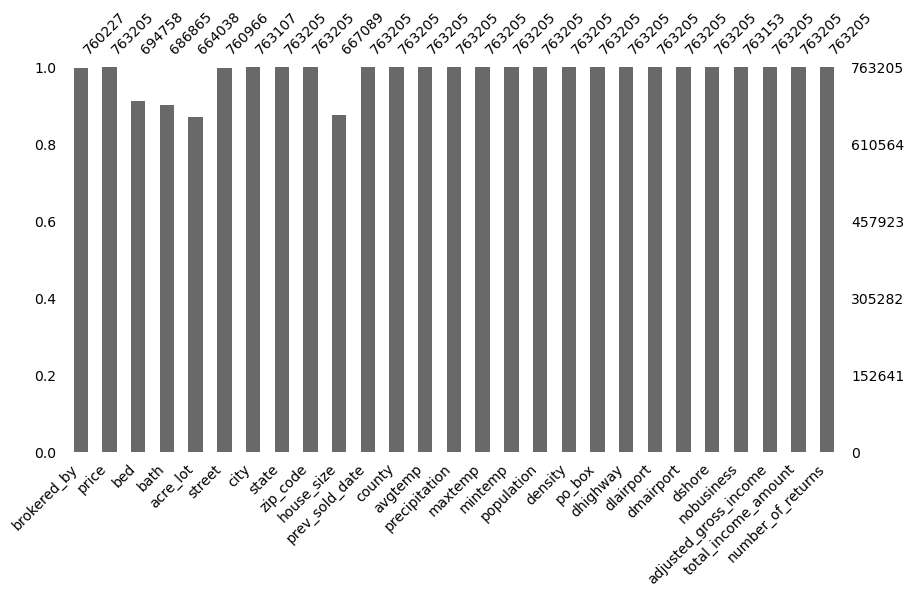

In [103]:
missingno.bar(sold_merged, figsize = (10,5), fontsize = 10)

<Axes: >

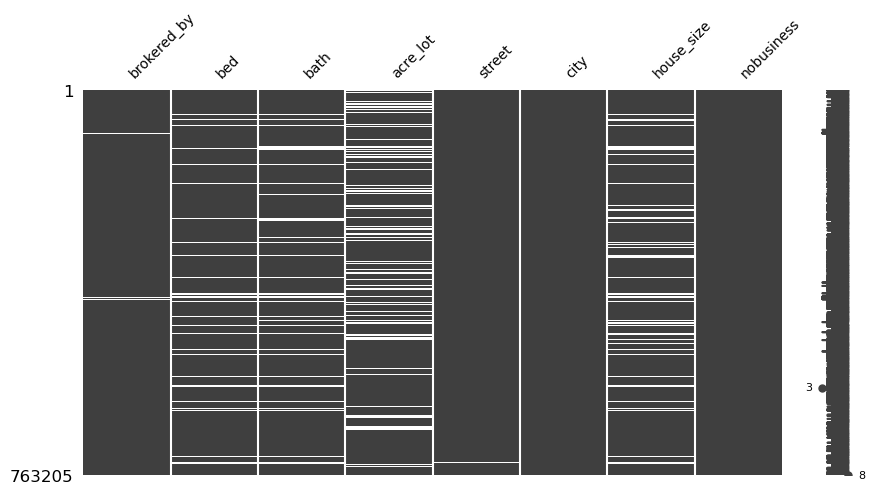

In [104]:
missingno.matrix(sold_merged[['brokered_by', 'bed', 'bath', 'acre_lot', 'street', 'city', 'house_size', 'nobusiness']], figsize = (10,5), fontsize = 10)

<Axes: >

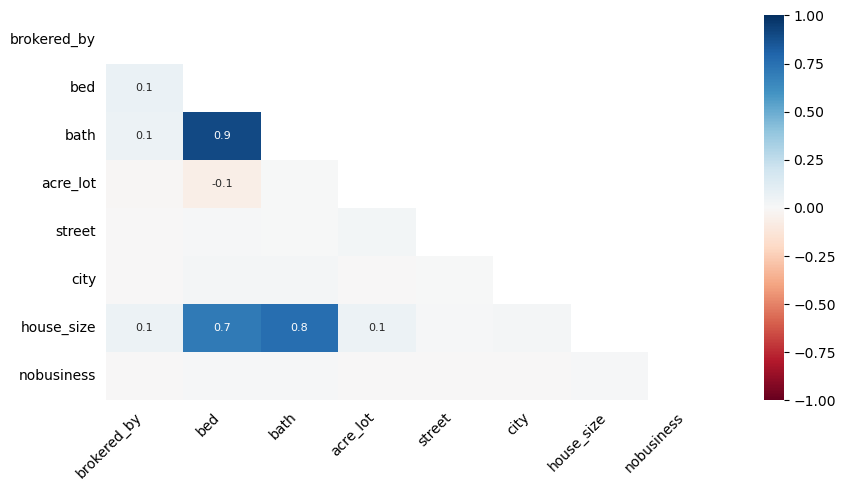

In [105]:
missingno.heatmap(sold_merged, figsize = (10,5), fontsize = 10)

<Axes: >

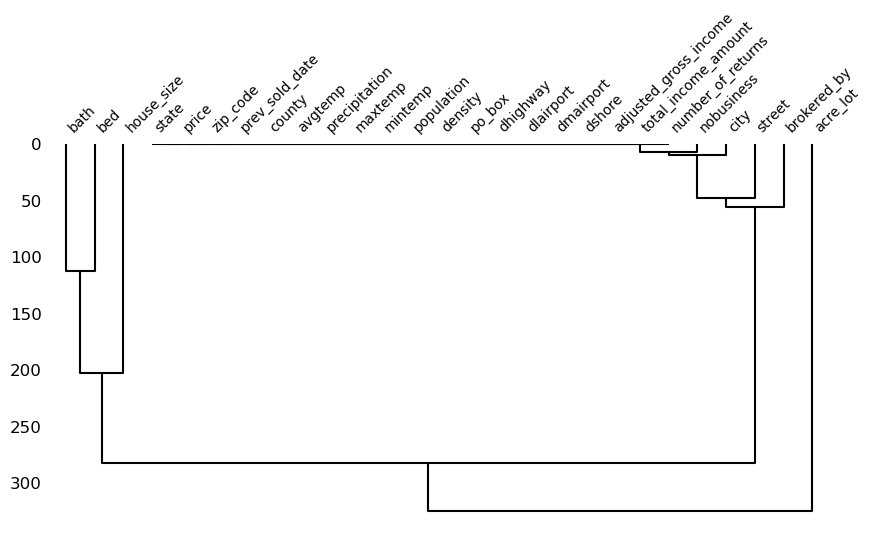

In [106]:
missingno.dendrogram(sold_merged, figsize = (10,5), fontsize = 10)

In [107]:
# Correlations to see if there are any strong ones which could be used for imputation
sold_merged.corr(numeric_only = True)

,price,bed,bath,acre_lot,house_size,avgtemp,precipitation,maxtemp,mintemp,population,density,dhighway,dlairport,dmairport,dshore,nobusiness,adjusted_gross_income,total_income_amount,number_of_returns
price,1.000000,0.212643,0.372301,0.004493,0.177943,0.027547,-0.130851,0.029354,0.024337,0.058553,0.181328,-0.060678,-0.124364,-0.057412,-0.113087,0.191364,0.338794,0.339069,0.067798
bed,0.212643,1.000000,0.650926,0.000767,0.315580,-0.025176,-0.005585,-0.018886,-0.031009,0.049179,-0.094725,-0.013015,0.013680,0.008198,0.024433,-0.059682,0.017484,0.017468,0.038898
bath,0.372301,0.650926,1.000000,-0.002201,0.382278,0.043945,0.029553,0.043149,0.043135,0.062293,-0.047591,-0.036321,-0.058066,-0.007394,-0.018570,0.049277,0.167357,0.167649,0.066004
acre_lot,0.004493,0.000767,-0.002201,1.000000,0.000420,-0.007597,-0.003892,-0.007023,-0.007977,-0.004063,-0.001239,0.002229,0.008620,-0.003589,-0.000476,-0.001539,-0.004053,-0.004053,-0.004329
house_size,0.177943,0.315580,0.382278,0.000420,1.000000,-0.009004,0.010956,-0.008427,-0.009193,0.000670,-0.031688,0.008854,0.002356,0.013856,0.015909,-0.001578,0.052299,0.052441,-0.000995
avgtemp,0.027547,-0.025176,0.043945,-0.007597,-0.009004,1.000000,-0.029621,0.983478,0.980186,0.198664,-0.010191,-0.062596,-0.183637,-0.120263,-0.090702,0.044528,0.088278,0.088041,0.190323
precipitation,-0.130851,-0.005585,0.029553,-0.003892,0.010956,-0.029621,1.000000,-0.152360,0.106175,-0.138789,-0.036539,0.013333,-0.112476,0.010530,-0.201906,-0.048371,-0.074332,-0.074497,-0.121389
maxtemp,0.029354,-0.018886,0.043149,-0.007023,-0.008427,0.983478,-0.152360,1.000000,0.928167,0.203412,-0.045010,-0.041268,-0.115426,-0.103921,0.013610,0.030335,0.069092,0.068876,0.189486
mintemp,0.024337,-0.031009,0.043135,-0.007977,-0.009193,0.980186,0.106175,0.928167,1.000000,0.185698,0.027675,-0.083581,-0.250990,-0.133487,-0.200474,0.058089,0.105452,0.105201,0.183773
population,0.058553,0.049179,0.062293,-0.004063,0.000670,0.198664,-0.138789,0.203412,0.185698,1.000000,0.225379,-0.275881,-0.198650,-0.257190,-0.073994,0.517063,0.566109,0.565635,0.985191


In [108]:
# In advance of any imputation, add a flag to say if the value was originally missing
sold_merged['missing_bed'] = sold_merged['bed'].isna().astype('int')
sold_merged['missing_bath'] = sold_merged['bath'].isna().astype('int')
sold_merged['missing_acre'] = sold_merged['acre_lot'].isna().astype('int')
sold_merged['missing_size'] = sold_merged['house_size'].isna().astype('int')


In [109]:
# Finding percentiles for bed and bathroom counts.
# We may wish to cap outliers, and then for imputation bin house sizes into the number of bins equal to these caps.
print('Bed 99th:', sold_merged.bed.quantile(0.99))
print('Bath 99th:', sold_merged.bath.quantile(0.99))
print('Acre 99th:', sold_merged.acre_lot.quantile(0.99))
print('Size 99.5th:', sold_merged.house_size.quantile(0.995))
print('Precipitation 99.9th:', sold_merged.precipitation.quantile(0.995))
print('Highway 99.5th:', sold_merged.dhighway.quantile(0.995))
print('Large airport 99.5th:', sold_merged.dlairport.quantile(0.95))
print('Medium airport 99.5th:', sold_merged.dmairport.quantile(0.995))
print('Shoreline 99.5th:', sold_merged.dshore.quantile(0.97))
print('Business count 99.5th:', sold_merged.nobusiness.quantile(0.995))
print('Gross income 99.5th:', sold_merged.adjusted_gross_income.quantile(0.995))
print('Total income 99.5th:', sold_merged.total_income_amount.quantile(0.995))
print('Tax return count 99.5th:', sold_merged.number_of_returns.quantile(0.995))

print('Price 99.5th:', sold_merged.price.quantile(0.995))

Bed 99th: 6.0
Bath 99th: 6.0
Acre 99th: 37.10890000000014
Size 99.5th: 6405.0
Precipitation 99.9th: 98.39
Highway 99.5th: 99.0406999194664
Large airport 99.5th: 276.0337909073368
Medium airport 99.5th: 96.67301855825173
Shoreline 99.5th: 776.334156646791
Business count 99.5th: 2927.0
Gross income 99.5th: 7768285.0
Total income 99.5th: 7855178.0
Tax return count 99.5th: 46860.0
Price 99.5th: 3850000.0


In [110]:
# Finding percentiles for bed and bathroom counts.
# We may wish to cap outliers, and then for imputation bin house sizes into the number of bins equal to these caps.
print('Bed outliers:', len(sold_merged[sold_merged.bed > sold_merged.bed.quantile(0.99)]))
print('Bath outliers:', len(sold_merged[sold_merged.bath > sold_merged.bath.quantile(0.99)]))
print('Acre outliers:', len(sold_merged[sold_merged.acre_lot > sold_merged.acre_lot.quantile(0.99)]))
print('Size outliers:', len(sold_merged[sold_merged.house_size > sold_merged.house_size.quantile(0.995)]))
print('Precipitation outliers:', len(sold_merged[sold_merged.precipitation > sold_merged.precipitation.quantile(0.995)]))
print('Highway distance outliers:', len(sold_merged[sold_merged.dhighway > sold_merged.dhighway.quantile(0.995)]))
print('Large airport distance outliers:', len(sold_merged[sold_merged.dlairport > sold_merged.dlairport.quantile(0.995)]))
print('Medium airport distance outliers:', len(sold_merged[sold_merged.dmairport > sold_merged.dmairport.quantile(0.995)]))
print('Shoreline distance outliers:', len(sold_merged[sold_merged.dshore > sold_merged.dshore.quantile(0.995)]))
print('Business count outliers:', len(sold_merged[sold_merged.nobusiness > sold_merged.nobusiness.quantile(0.995)]))
print('Gross income outliers:', len(sold_merged[sold_merged.adjusted_gross_income > sold_merged.adjusted_gross_income.quantile(0.995)]))
print('Total income outliers:', len(sold_merged[sold_merged.total_income_amount > sold_merged.total_income_amount.quantile(0.995)]))
print('Tax return count outliers:', len(sold_merged[sold_merged.number_of_returns > sold_merged.number_of_returns.quantile(0.995)]))

print('Price outliers:', len(sold_merged[sold_merged.price > sold_merged.price.quantile(0.995)]))

Bed outliers: 4308
Bath outliers: 3100
Acre outliers: 6641
Size outliers: 3334
Precipitation outliers: 1610
Highway distance outliers: 3761
Large airport distance outliers: 3803
Medium airport distance outliers: 3817
Shoreline distance outliers: 3804
Business count outliers: 3746
Gross income outliers: 3730
Total income outliers: 3730
Tax return count outliers: 3781
Price outliers: 3814


In [111]:
# In advance of outlier capping, add a flag to say it was done
sold_merged['capped_bed'] = (sold_merged['bed'] > sold_merged.bed.quantile(0.99)).astype('int')
sold_merged['capped_bath'] = (sold_merged['bath'] > sold_merged.bath.quantile(0.99)).astype('int')
sold_merged['capped_acre'] = (sold_merged['acre_lot'] > sold_merged.acre_lot.quantile(0.99)).astype('int')
sold_merged['capped_size'] = (sold_merged['house_size'] > sold_merged.house_size.quantile(0.995)).astype('int')
sold_merged['capped_precip'] = (sold_merged['precipitation'] > sold_merged.precipitation.quantile(0.95)).astype('int')
sold_merged['capped_highway'] = (sold_merged['dhighway'] > sold_merged.dhighway.quantile(0.99)).astype('int')
sold_merged['capped_lairport'] = (sold_merged['dhighway'] > sold_merged.dhighway.quantile(0.99)).astype('int')
sold_merged['capped_mairport'] = (sold_merged['dhighway'] > sold_merged.dhighway.quantile(0.99)).astype('int')
sold_merged['capped_shore'] = (sold_merged['dhighway'] > sold_merged.dhighway.quantile(0.99)).astype('int')

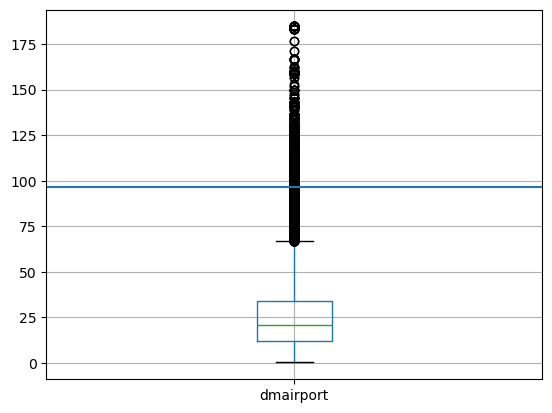

In [112]:
sold_merged.boxplot('dmairport')
plt.hlines(y = sold_merged.dmairport.quantile(0.995), xmin = 0.5, xmax = 1.5)

In [113]:
sold_merged.columns

Index(['brokered_by', 'price', 'bed', 'bath', 'acre_lot', 'street', 'city',
       'state', 'zip_code', 'house_size', 'prev_sold_date', 'county',
       'avgtemp', 'precipitation', 'maxtemp', 'mintemp', 'population',
       'density', 'po_box', 'dhighway', 'dlairport', 'dmairport', 'dshore',
       'nobusiness', 'adjusted_gross_income', 'total_income_amount',
       'number_of_returns', 'missing_bed', 'missing_bath', 'missing_acre',
       'missing_size', 'capped_bed', 'capped_bath', 'capped_acre',
       'capped_size', 'capped_precip', 'capped_highway', 'capped_lairport',
       'capped_mairport', 'capped_shore'],
      dtype='object')

In [114]:
def cap_outliers(column, percentile):
    col = sold_merged[column]
    cap = col.quantile(percentile)
    return col.apply(lambda x: cap if x > cap else x)

In [155]:
sold_merged['treated_bed'] = cap_outliers('bed', 0.99)
sold_merged['treated_bath'] = cap_outliers('bath', 0.99)
sold_merged['treated_acre'] = cap_outliers('acre_lot', 0.99)
sold_merged['treated_size'] = cap_outliers('house_size', 0.995)

In [117]:
print('Min house size:', sold_merged.house_size.min())
print('Capped house size (99.5% percentile):', sold_merged.treated_size.quantile(0.995))
print('Rate of houses with 1/2/3/4/5/6 bedrooms:', len(sold_merged[sold_merged.bed == 1])/len(sold_merged[sold_merged.bed <= 6]), len(sold_merged[sold_merged.bed == 2])/len(sold_merged[sold_merged.bed <= 6]), len(sold_merged[sold_merged.bed == 3])/len(sold_merged[sold_merged.bed <= 6]), len(sold_merged[sold_merged.bed == 4])/len(sold_merged[sold_merged.bed <= 6]), len(sold_merged[sold_merged.bed == 5])/len(sold_merged[sold_merged.bed <= 6]), len(sold_merged[sold_merged.bed == 6])/len(sold_merged[sold_merged.bed <= 6])) 
print('Six pools upper bounds:', 6405*0.034310956622492575, 6405*(0.1890013759142588+0.034310956622492575), 6405*(0.1890013759142588+0.034310956622492575+0.4589253385473242), 6405*(0.1890013759142588+0.034310956622492575+0.4589253385473242+0.24550076037366936), 6405*(0.1890013759142588+0.034310956622492575+0.4589253385473242+0.24550076037366936+0.05979723368817438), 6405*(0.1890013759142588+0.034310956622492575+0.4589253385473242+0.24550076037366936+0.05979723368817438+0.012464334854080671))


Min house size: 100.0
Capped house size (99.5% percentile): 6405.0
Rate of houses with 1/2/3/4/5/6 bedrooms: 0.034310956622492575 0.1890013759142588 0.4589253385473242 0.24550076037366936 0.05979723368817438 0.012464334854080671
Six pools upper bounds: 219.76167716706493 1430.3154898978926 4369.732283293504 5942.164653486857 6325.165935259613 6405.0


In [118]:
print('Min house size:', sold_merged.house_size.min())
print('Capped house size (99.5% percentile):', sold_merged.treated_size.quantile(0.995))
print('Rate of houses with 1/2/3/4/5/6 bedrooms:', len(sold_merged[sold_merged.bath == 1])/len(sold_merged[sold_merged.bath <= 6]), len(sold_merged[sold_merged.bath == 2])/len(sold_merged[sold_merged.bath <= 6]), len(sold_merged[sold_merged.bath == 3])/len(sold_merged[sold_merged.bath <= 6]), len(sold_merged[sold_merged.bath == 4])/len(sold_merged[sold_merged.bath <= 6]), len(sold_merged[sold_merged.bath == 5])/len(sold_merged[sold_merged.bath <= 6]), len(sold_merged[sold_merged.bath == 6])/len(sold_merged[sold_merged.bath <= 6])) 
print('Six pools upper bounds:', 6405*0.15126834511857143, 6405*(0.15126834511857143+0.4673593997937888), 6405*(0.15126834511857143+0.4673593997937888+0.2736056978640322), 6405*(0.15126834511857143+0.4673593997937888+0.2736056978640322+0.08176639634962304), 6405*(0.15126834511857143+0.4673593997937888+0.2736056978640322+0.08176639634962304+0.01986208712057505), 6405*(0.15126834511857143+0.4673593997937888+0.2736056978640322+0.08176639634962304+0.01986208712057505+0.006138073753409432))


Min house size: 100.0
Capped house size (99.5% percentile): 6405.0
Rate of houses with 1/2/3/4/5/6 bedrooms: 0.15126834511857143 0.4673593997937888 0.2736056978640322 0.08176639634962304 0.01986208712057505 0.006138073753409432
Six pools upper bounds: 968.87375048445 3962.3107061636674 5714.755200982794 6238.46896960213 6365.685637609412 6405.0


Missingness flag dictionary:
- 1: Median imputed
- 2: Bed and bathroom imputed by pooling based on unmissing house size

In [157]:
# Imputing bed values for columns with house size present
sold_merged['missing_bed'] = sold_merged['missing_bed'].where(~((sold_merged['missing_bed'] == 1) & (sold_merged['missing_size'] == 0)), 2)
sold_merged['treated_bed'] = sold_merged['treated_bed'].where(~((sold_merged['missing_bed'] == 2) & (sold_merged['house_size'] < 219.76167716706493)), 1)
sold_merged['treated_bed'] = sold_merged['treated_bed'].where(~((sold_merged['missing_bed'] == 2) & (sold_merged['house_size'] >= 219.76167716706493) & (sold_merged['house_size'] < 1430.3154898978926)), 2)
sold_merged['treated_bed'] = sold_merged['treated_bed'].where(~((sold_merged['missing_bed'] == 2) & (sold_merged['house_size'] >= 1430.3154898978926) & (sold_merged['house_size'] < 4369.732283293504)), 3)
sold_merged['treated_bed'] = sold_merged['treated_bed'].where(~((sold_merged['missing_bed'] == 2) & (sold_merged['house_size'] >= 4369.732283293504) & (sold_merged['house_size'] < 5942.164653486857)), 4)
sold_merged['treated_bed'] = sold_merged['treated_bed'].where(~((sold_merged['missing_bed'] == 2) & (sold_merged['house_size'] >= 5942.164653486857) & (sold_merged['house_size'] < 6325.165935259613)), 5)
sold_merged['treated_bed'] = sold_merged['treated_bed'].where(~((sold_merged['missing_bed'] == 2) & (sold_merged['house_size'] >= 6325.165935259613)), 6)

In [159]:
# Imputing bath values for columns with house size present
sold_merged['missing_bath'] = sold_merged['missing_bath'].where(~((sold_merged['missing_bath'] == 1) & (sold_merged['missing_size'] == 0)), 2)
sold_merged['treated_bath'] = sold_merged['treated_bath'].where(~((sold_merged['missing_bath'] == 2) & (sold_merged['house_size'] < 968.87375048445)), 1)
sold_merged['treated_bath'] = sold_merged['treated_bath'].where(~((sold_merged['missing_bath'] == 2) & (sold_merged['house_size'] >= 968.87375048445) & (sold_merged['house_size'] < 3962.3107061636674)), 2)
sold_merged['treated_bath'] = sold_merged['treated_bath'].where(~((sold_merged['missing_bath'] == 2) & (sold_merged['house_size'] >= 3962.3107061636674) & (sold_merged['house_size'] < 5714.755200982794)), 3)
sold_merged['treated_bath'] = sold_merged['treated_bath'].where(~((sold_merged['missing_bath'] == 2) & (sold_merged['house_size'] >= 5714.755200982794) & (sold_merged['house_size'] < 6238.46896960213)), 4)
sold_merged['treated_bath'] = sold_merged['treated_bath'].where(~((sold_merged['missing_bath'] == 2) & (sold_merged['house_size'] >= 6238.46896960213) & (sold_merged['house_size'] < 6365.685637609412)), 5)
sold_merged['treated_bath'] = sold_merged['treated_bath'].where(~((sold_merged['missing_bath'] == 2) & (sold_merged['house_size'] >= 6365.685637609412)), 6)

<Axes: >

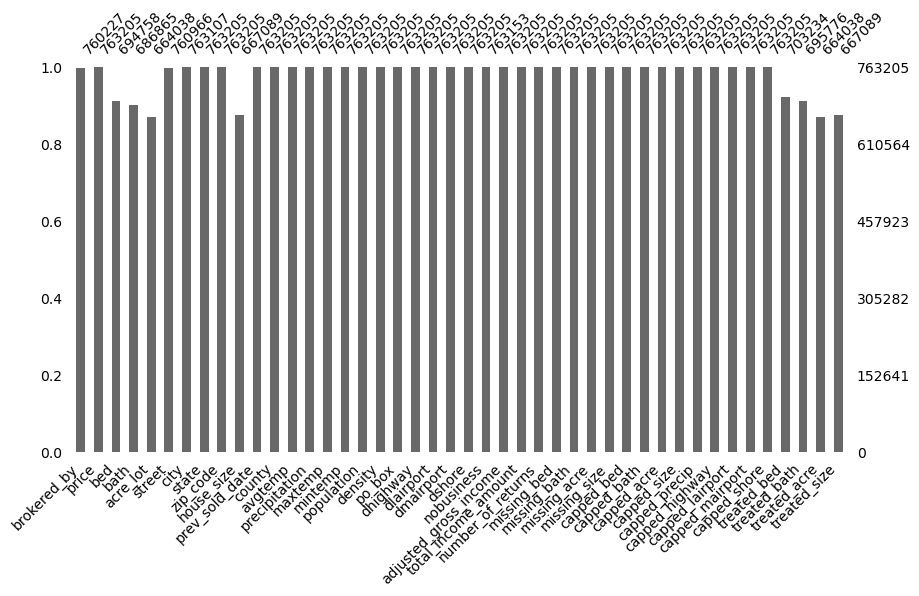

In [160]:
missingno.bar(sold_merged, figsize = (10,5), fontsize = 10)

In [162]:
bed_med = sold_merged.bed.median()
bath_med = sold_merged.bath.median()
acre_med = sold_merged.acre_lot.median()
size_med = sold_merged.house_size.median()
sold_merged['treated_bed'] = sold_merged['treated_bed'].where(~(sold_merged['missing_bed'] == 1), bed_med)
sold_merged['treated_bath'] = sold_merged['treated_bath'].where(~(sold_merged['missing_bath'] == 1), bath_med)
sold_merged['treated_acre'] = sold_merged['treated_acre'].where(~(sold_merged['missing_acre'] == 1), acre_med)
sold_merged['treated_size'] = sold_merged['treated_size'].where(~(sold_merged['missing_size'] == 1), size_med)

<Axes: >

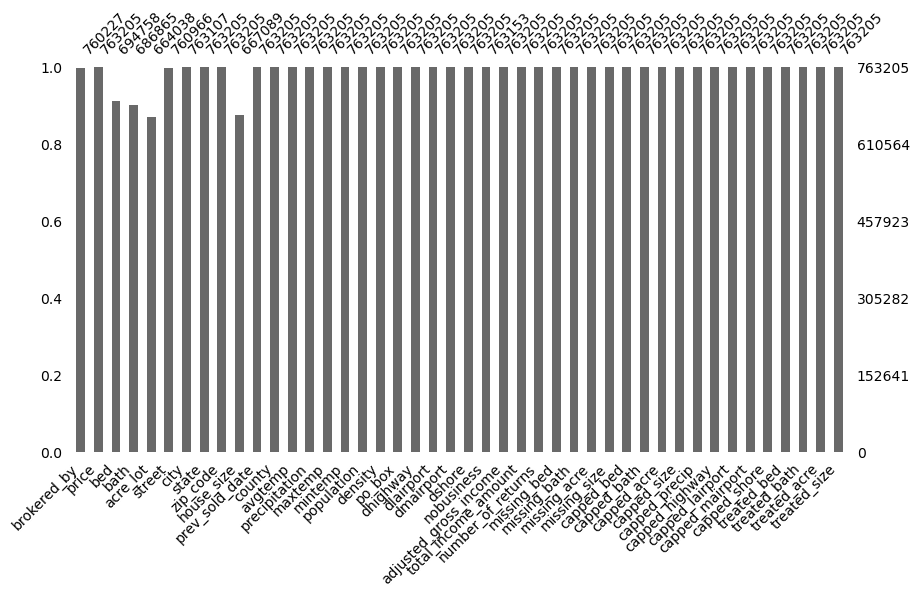

In [165]:
missingno.bar(sold_merged, figsize = (10,5), fontsize = 10)